# **ADDNN - HW3 : Ali Rashidi Moghadam 810100357 | Keyvan Kazemi 810100443**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset :**

In [3]:
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import models
from keras.models import Model

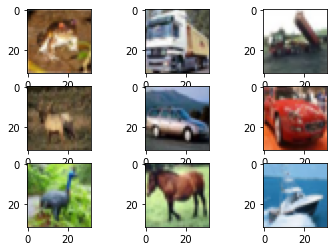

In [4]:
## Visualizing
from matplotlib import pyplot

(x_train,y_train) , (x_test , y_test) = cifar10.load_data()

#Normalizing
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0


for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i])
pyplot.show()

In [5]:
## Choosing a subsample of train data with equal distribution
import numpy as np
from sklearn.model_selection import train_test_split

_, x_sub, _, y_sub = train_test_split(x_train,y_train , test_size=0.1 ,stratify=y_train ,  random_state=666)

print("Subsample size : " , y_sub.shape[0])
print(np.unique(y_sub, return_counts=True))

Subsample size :  5000
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500]))


# **CSI Function :**

In [6]:
def CSI(x,y) :
  x = x.reshape(x.shape[0] , -1)
  class_labels=np.sort(np.unique(y))

  mean=[]
  for i in class_labels:
    ind=np.where(y==i)
    ind=list(ind[0])
    x_same = x[ind , :]
    m= np.mean(x_same,axis=0)
    mean.append(m)
  

  csi_tracker=0
  for i in range(x.shape[0]):
    distance=[]

    for j in class_labels:
      dist_vect = x[i,:]-mean[j]
      distance.append(np.linalg.norm(dist_vect))
    
    if np.argmin(distance)==y[i]:
      csi_tracker=csi_tracker+1

  csi = csi_tracker / x.shape[0]

  return csi


# **Part A :**

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_70 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_71 (TFOpLambda)  (None, 16, 16, 128)       0         
                                                          

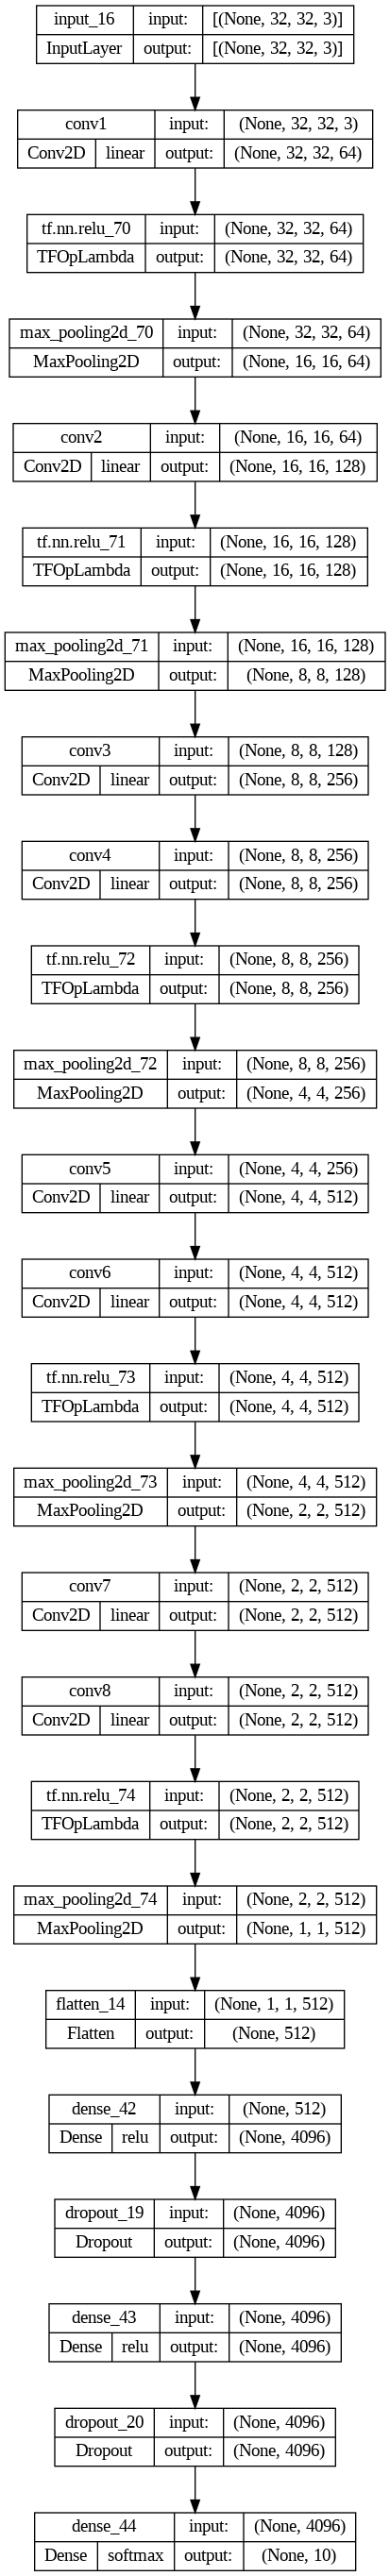

In [55]:
## VGG 11 

inputs = keras.Input(shape=(32,32,3))

x = layers.Conv2D (
    filters=64 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv1")(inputs)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x = layers.Conv2D (
    filters=128 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv2")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x = layers.Conv2D (
    filters=256 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv3")(x)
x = layers.Conv2D (
    filters=256 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv4")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv5")(x)
x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv6")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv7")(x)
x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv8")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x=layers.Flatten()(x)
x=layers.Dense(4096 , activation='relu')(x)
x=layers.Dropout(0.5)(x)
x=layers.Dense(4096, activation='relu')(x)
x=layers.Dropout(0.5)(x)
output=layers.Dense(10 ,activation='softmax')(x)

model=keras.Model(inputs=inputs , outputs= output)

print(model.summary())

tf.keras.utils.plot_model(model , show_layer_names=True , show_layer_activations=True , show_shapes=True)

In [56]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history = model.fit(x_train,y_train , batch_size=32 , epochs=10 , verbose=2 ,validation_split=0.33)

Epoch 1/10
1047/1047 - 28s - loss: 2.3580 - accuracy: 0.2444 - val_loss: 1.8014 - val_accuracy: 0.3618 - 28s/epoch - 27ms/step
Epoch 2/10
1047/1047 - 26s - loss: 1.6585 - accuracy: 0.4422 - val_loss: 1.5340 - val_accuracy: 0.4916 - 26s/epoch - 25ms/step
Epoch 3/10
1047/1047 - 26s - loss: 1.4143 - accuracy: 0.5477 - val_loss: 1.2784 - val_accuracy: 0.6027 - 26s/epoch - 25ms/step
Epoch 4/10
1047/1047 - 26s - loss: 1.2524 - accuracy: 0.6172 - val_loss: 1.3238 - val_accuracy: 0.6039 - 26s/epoch - 25ms/step
Epoch 5/10
1047/1047 - 24s - loss: 1.1384 - accuracy: 0.6625 - val_loss: 1.1361 - val_accuracy: 0.6669 - 24s/epoch - 23ms/step
Epoch 6/10
1047/1047 - 26s - loss: 1.0422 - accuracy: 0.7001 - val_loss: 1.0796 - val_accuracy: 0.6935 - 26s/epoch - 25ms/step
Epoch 7/10
1047/1047 - 24s - loss: 0.9747 - accuracy: 0.7311 - val_loss: 1.1868 - val_accuracy: 0.6698 - 24s/epoch - 23ms/step
Epoch 8/10
1047/1047 - 24s - loss: 0.9085 - accuracy: 0.7549 - val_loss: 1.0744 - val_accuracy: 0.7072 - 24s/ep

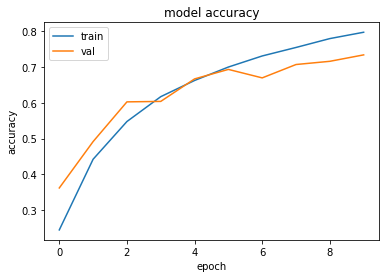

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

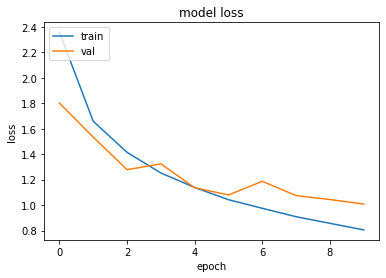

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [132]:
model.save("vgg11cifar10_A.h5")

In [9]:
model_A= models.load_model("vgg11cifar10_A.h5")

csi_list=[]
for i in range(1 , 9):
  layer_name = "conv"+str(i)

  intermediate_layer_model = Model(inputs=model_A.input,
                                 outputs=model_A.get_layer(layer_name).output)
  intermediate_output = intermediate_layer_model.predict(x_sub)

  out_flat=intermediate_output.reshape(intermediate_output.shape[0] , (intermediate_output.shape[1]*intermediate_output.shape[2]*intermediate_output.shape[3]) )
  
  csi = CSI(out_flat , y_sub)
  print("CSI @  " + layer_name + " = " + str(csi))
  csi_list.append(csi)

157/157 [==============================] - 0s 1ms/step
CSI @  conv1 = 0.318
157/157 [==============================] - 1s 3ms/step
CSI @  conv2 = 0.3774
157/157 [==============================] - 0s 2ms/step
CSI @  conv3 = 0.5358
157/157 [==============================] - 0s 2ms/step
CSI @  conv4 = 0.4742
157/157 [==============================] - 1s 2ms/step
CSI @  conv5 = 0.7464
157/157 [==============================] - 1s 3ms/step
CSI @  conv6 = 0.742
157/157 [==============================] - 1s 4ms/step
CSI @  conv7 = 0.789
157/157 [==============================] - 1s 4ms/step
CSI @  conv8 = 0.7852


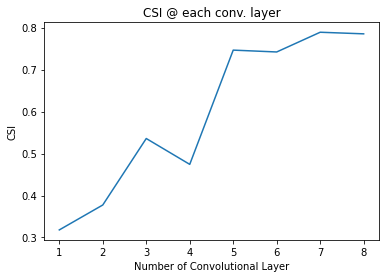

In [15]:
plt.plot(range(1,9) , csi_list)
plt.ylabel("CSI")
plt.xlabel("Number of Convolutional Layer")
plt.title("CSI @ each conv. layer")
plt.show()

# **Part B :**

In [26]:
## VGG 11 : Layer By Layer (Freezing previous layers)

print("1st sublayer :: ")

inputs = keras.Input(shape=(32,32,3))
x = layers.Conv2D (
    filters=64 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv1")(inputs)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
output1=layers.Dense(10 ,activation='softmax')(x)
model=keras.Model(inputs=inputs , outputs=output1)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history1 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

1st sublayer :: 
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_18 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 16384)             0         
                                                                 
 dense_10 (Dense)            (None, 10)                163850    
                                         

In [28]:
print("2nd sublayer :: ")
for layer in model.layers:
    layer.trainable = False
x = model.layers[-3].output 
x = layers.Conv2D (
    filters=128 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv2")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history2 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

2nd sublayer :: 
Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_18 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_19 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [29]:
print("3nd sublayer :: ")
for layer in model.layers:
    layer.trainable = False
x = model.layers[-3].output 
x = layers.Conv2D (
    filters=256 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv3")(x)
x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history3 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

3nd sublayer :: 
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_18 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_19 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [30]:
print("4th sublayer :: ")
for layer in model.layers:
    layer.trainable = False
x = model.layers[-3].output 

x = layers.Conv2D (
    filters=256 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv4")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history4 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

4th sublayer :: 
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_18 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_19 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [31]:
print("5th sublayer :: ")
for layer in model.layers:
    layer.trainable = False
x = model.layers[-3].output 

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv5")(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history5 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

5th sublayer :: 
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_18 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_19 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [32]:
print("6th sublayer :: ")
for layer in model.layers:
    layer.trainable = False
x = model.layers[-3].output 

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv6")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history6 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

6th sublayer :: 
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_18 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_19 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [33]:
print("7th sublayer :: ")
for layer in model.layers:
    layer.trainable = False
x = model.layers[-3].output 

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv7")(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history7 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

7th sublayer :: 
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_18 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_19 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [34]:
print("8th sublayer :: ")
for layer in model.layers:
    layer.trainable = False
x = model.layers[-3].output 

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv8")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history8 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

8th sublayer :: 
Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_18 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_19 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

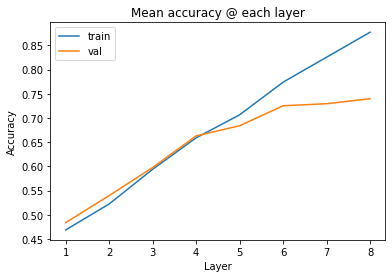

In [43]:
acc=[ np.mean(history1.history['accuracy']) , np.mean(history2.history['accuracy']) ,
     np.mean(history3.history['accuracy']) ,np.mean(history4.history['accuracy']) ,
     np.mean(history5.history['accuracy']) ,np.mean(history6.history['accuracy']) ,
     np.mean(history7.history['accuracy']) ,np.mean(history8.history['accuracy']) ]

val_acc=[ np.mean(history1.history['val_accuracy']) , np.mean(history2.history['val_accuracy']) ,
     np.mean(history3.history['val_accuracy']) ,np.mean(history4.history['val_accuracy']) ,
     np.mean(history5.history['val_accuracy']) ,np.mean(history6.history['val_accuracy']) ,
     np.mean(history7.history['val_accuracy']) ,np.mean(history8.history['val_accuracy']) ]

plt.plot(range(1,9),acc)
plt.plot(range(1,9),val_acc)
plt.title('Mean accuracy @ each layer')
plt.ylabel('Accuracy')
plt.xlabel('Layer')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

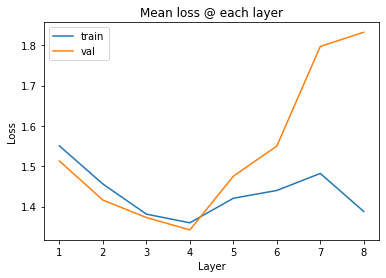

In [42]:
loss=[ np.mean(history1.history['loss']) , np.mean(history2.history['loss']) ,
     np.mean(history3.history['loss']) ,np.mean(history4.history['loss']) ,
     np.mean(history5.history['loss']) ,np.mean(history6.history['loss']) ,
     np.mean(history7.history['loss']) ,np.mean(history8.history['loss']) ]

val_loss=[ np.mean(history1.history['val_loss']) , np.mean(history2.history['val_loss']) ,
     np.mean(history3.history['val_loss']) ,np.mean(history4.history['val_loss']) ,
     np.mean(history5.history['val_loss']) ,np.mean(history6.history['val_loss']) ,
     np.mean(history7.history['val_loss']) ,np.mean(history8.history['val_loss']) ]

plt.plot(range(1,9),loss)
plt.plot(range(1,9),val_loss)
plt.title('Mean loss @ each layer')
plt.ylabel('Loss')
plt.xlabel('Layer')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
model.save("vgg11cifar10_B.h5")

In [45]:
model_B= models.load_model("vgg11cifar10_B.h5")

In [46]:
csi_list=[]
for i in range(1 , 9):
  layer_name = "conv"+str(i)

  intermediate_layer_model = Model(inputs=model_B.input,
                                 outputs=model_B.get_layer(layer_name).output)
  intermediate_output = intermediate_layer_model.predict(x_sub)

  out_flat=intermediate_output.reshape(intermediate_output.shape[0] , (intermediate_output.shape[1]*intermediate_output.shape[2]*intermediate_output.shape[3]) )
  
  csi = CSI(out_flat , y_sub)
  print("CSI @  " + layer_name + " = " + str(csi))
  csi_list.append(csi)

157/157 [==============================] - 0s 1ms/step
CSI @  conv1 = 0.3122
157/157 [==============================] - 0s 2ms/step
CSI @  conv2 = 0.3702
157/157 [==============================] - 0s 3ms/step
CSI @  conv3 = 0.4822
157/157 [==============================] - 0s 2ms/step
CSI @  conv4 = 0.5004
157/157 [==============================] - 0s 2ms/step
CSI @  conv5 = 0.6284
157/157 [==============================] - 0s 3ms/step
CSI @  conv6 = 0.6364
157/157 [==============================] - 1s 3ms/step
CSI @  conv7 = 0.7754
157/157 [==============================] - 1s 4ms/step
CSI @  conv8 = 0.7882


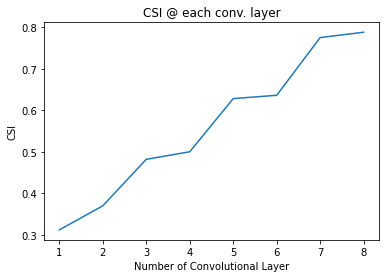

In [47]:
plt.plot(range(1,9) , csi_list)
plt.ylabel("CSI")
plt.xlabel("Number of Convolutional Layer")
plt.title("CSI @ each conv. layer")
plt.show()

# **Part C :**

In [48]:
## VGG 11 : Layer By Layer (Training previous layers)

print("1st sublayer :: ")

inputs = keras.Input(shape=(32,32,3))
x = layers.Conv2D (
    filters=64 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv1")(inputs)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
output1=layers.Dense(10 ,activation='softmax')(x)
model=keras.Model(inputs=inputs , outputs=output1)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history1 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

1st sublayer :: 
Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_23 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 16384)             0         
                                                                 
 dense_18 (Dense)            (None, 10)                163850    
                                         

In [49]:
print("2nd sublayer :: ")
x = model.layers[-3].output 
x = layers.Conv2D (
    filters=128 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv2")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history2 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

2nd sublayer :: 
Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_23 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_24 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [50]:
print("3nd sublayer :: ")
x = model.layers[-3].output 
x = layers.Conv2D (
    filters=256 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv3")(x)
x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history3 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

3nd sublayer :: 
Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_23 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_24 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [51]:
print("4th sublayer :: ")

x = model.layers[-3].output 

x = layers.Conv2D (
    filters=256 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv4")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history4 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

4th sublayer :: 
Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_23 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_24 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [52]:
print("5th sublayer :: ")

x = model.layers[-3].output 

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv5")(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history5 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

5th sublayer :: 
Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_23 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_24 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [53]:
print("6th sublayer :: ")

x = model.layers[-3].output 

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv6")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history6 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

6th sublayer :: 
Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_23 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_24 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [54]:
print("7th sublayer :: ")

x = model.layers[-3].output 

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv7")(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history7 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

7th sublayer :: 
Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_23 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_24 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

In [55]:
print("8th sublayer :: ")

x = model.layers[-3].output 

x = layers.Conv2D (
    filters=512 , kernel_size = 3 , padding='same' , kernel_regularizer=regularizers.l2(0.001) , name = "conv8")(x)
x= keras.activations.relu(x)
x= layers.MaxPooling2D()(x)

x=layers.Flatten()(x)
output2=layers.Dense(10 ,activation='softmax')(x)
model = Model(inputs = model.input, outputs =output2)
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy'])

history8 = model.fit(x_train,y_train , batch_size=32 , epochs=5 , verbose=2 ,validation_split=0.33)

8th sublayer :: 
Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 tf.nn.relu_23 (TFOpLambda)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 128)       73856     
                                                                 
 tf.nn.relu_24 (TFOpLambda)  (None, 16, 16, 128)       0         
                                         

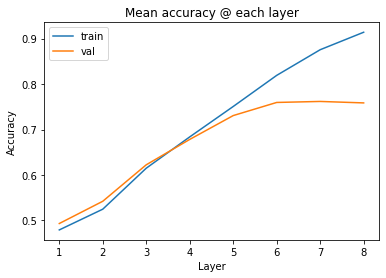

In [56]:
acc=[ np.mean(history1.history['accuracy']) , np.mean(history2.history['accuracy']) ,
     np.mean(history3.history['accuracy']) ,np.mean(history4.history['accuracy']) ,
     np.mean(history5.history['accuracy']) ,np.mean(history6.history['accuracy']) ,
     np.mean(history7.history['accuracy']) ,np.mean(history8.history['accuracy']) ]

val_acc=[ np.mean(history1.history['val_accuracy']) , np.mean(history2.history['val_accuracy']) ,
     np.mean(history3.history['val_accuracy']) ,np.mean(history4.history['val_accuracy']) ,
     np.mean(history5.history['val_accuracy']) ,np.mean(history6.history['val_accuracy']) ,
     np.mean(history7.history['val_accuracy']) ,np.mean(history8.history['val_accuracy']) ]

plt.plot(range(1,9),acc)
plt.plot(range(1,9),val_acc)
plt.title('Mean accuracy @ each layer')
plt.ylabel('Accuracy')
plt.xlabel('Layer')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

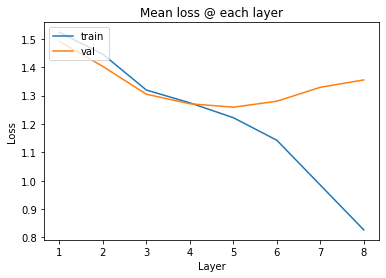

In [57]:
loss=[ np.mean(history1.history['loss']) , np.mean(history2.history['loss']) ,
     np.mean(history3.history['loss']) ,np.mean(history4.history['loss']) ,
     np.mean(history5.history['loss']) ,np.mean(history6.history['loss']) ,
     np.mean(history7.history['loss']) ,np.mean(history8.history['loss']) ]

val_loss=[ np.mean(history1.history['val_loss']) , np.mean(history2.history['val_loss']) ,
     np.mean(history3.history['val_loss']) ,np.mean(history4.history['val_loss']) ,
     np.mean(history5.history['val_loss']) ,np.mean(history6.history['val_loss']) ,
     np.mean(history7.history['val_loss']) ,np.mean(history8.history['val_loss']) ]

plt.plot(range(1,9),loss)
plt.plot(range(1,9),val_loss)
plt.title('Mean loss @ each layer')
plt.ylabel('Loss')
plt.xlabel('Layer')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
model.save("vgg11cifar10_C.h5")

In [64]:
model_C= models.load_model("vgg11cifar10_C.h5")

In [65]:
csi_list=[]
for i in range(1 , 9):
  layer_name = "conv"+str(i)

  intermediate_layer_model = Model(inputs=model_C.input,
                                 outputs=model_C.get_layer(layer_name).output)
  intermediate_output = intermediate_layer_model.predict(x_sub)

  out_flat=intermediate_output.reshape(intermediate_output.shape[0] , (intermediate_output.shape[1]*intermediate_output.shape[2]*intermediate_output.shape[3]) )
  
  csi = CSI(out_flat , y_sub)
  print("CSI @  " + layer_name + " = " + str(csi))
  csi_list.append(csi)

157/157 [==============================] - 0s 1ms/step
CSI @  conv1 = 0.3144
157/157 [==============================] - 0s 2ms/step
CSI @  conv2 = 0.3952
157/157 [==============================] - 0s 2ms/step
CSI @  conv3 = 0.5404
157/157 [==============================] - 0s 2ms/step
CSI @  conv4 = 0.5084
157/157 [==============================] - 0s 2ms/step
CSI @  conv5 = 0.814
157/157 [==============================] - 0s 3ms/step
CSI @  conv6 = 0.818
157/157 [==============================] - 1s 3ms/step
CSI @  conv7 = 0.8764
157/157 [==============================] - 1s 4ms/step
CSI @  conv8 = 0.87


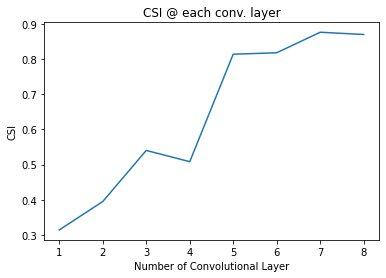

In [66]:
plt.plot(range(1,9) , csi_list)
plt.ylabel("CSI")
plt.xlabel("Number of Convolutional Layer")
plt.title("CSI @ each conv. layer")
plt.show()